In [14]:
# Bike Rental Demand Prediction: Data Visualization

# Purpose:
# - Visualize trends, patterns, and distributions in the bike sharing dataset
# - Explore relationships between features and the target variable (`count`)
# - Identify correlations and feature importance through plots and charts
# - Gain insights to guide feature engineering and model selection

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load training datasets
df=pd.read_csv('../data/train.csv')
df=df.drop(['casual', 'registered'], axis=1)

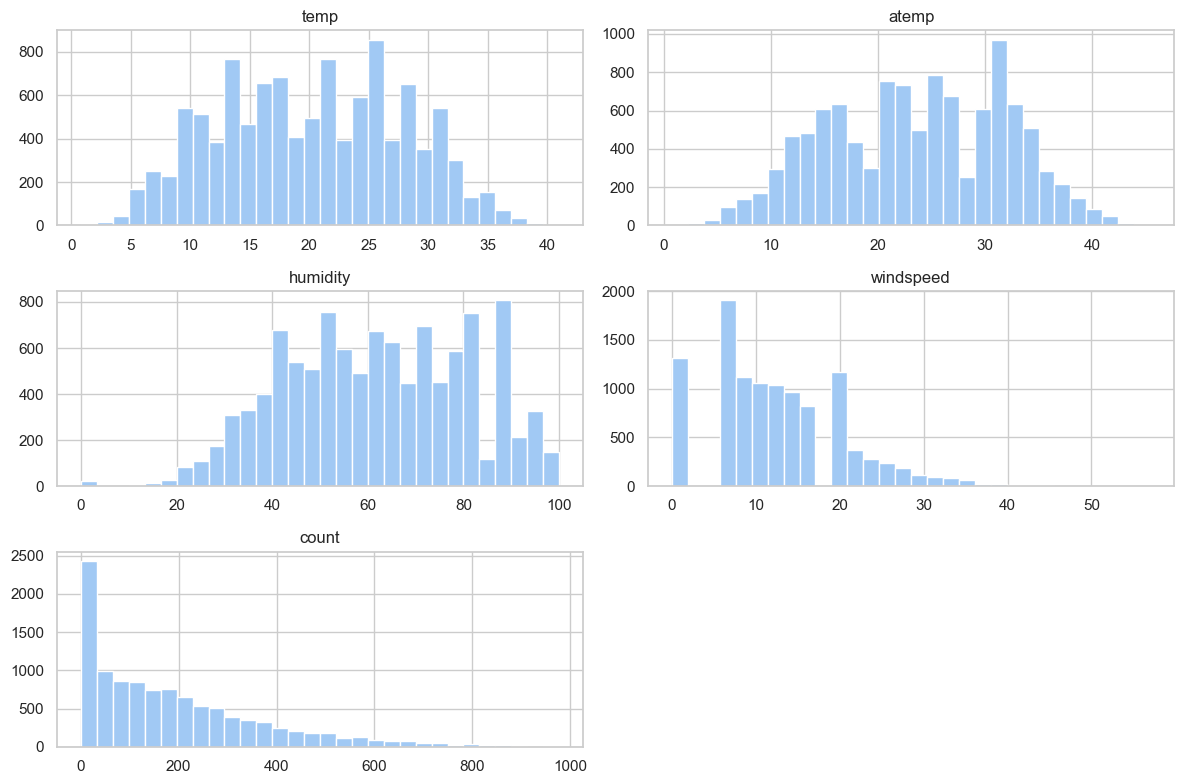

In [17]:
# Plotting histograms
num_cols=["temp", "atemp", "humidity", "windspeed", "count"]
df[num_cols].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [18]:
# Histogram conclusions: 
# 1. temp and atemp both are approximately normally distributed, peaking in the 20-30 range
# 2. Humidity's distibution is relatively flat acccross range 40%-90%
# 3. Windspread's distribution is strongly right-skewed, somajority bike rentals are at very low wind-speeds 
# 4. The target variable is heavily right-skewed. Mostc ounts are very low (under 200), indicating the need of log transformation

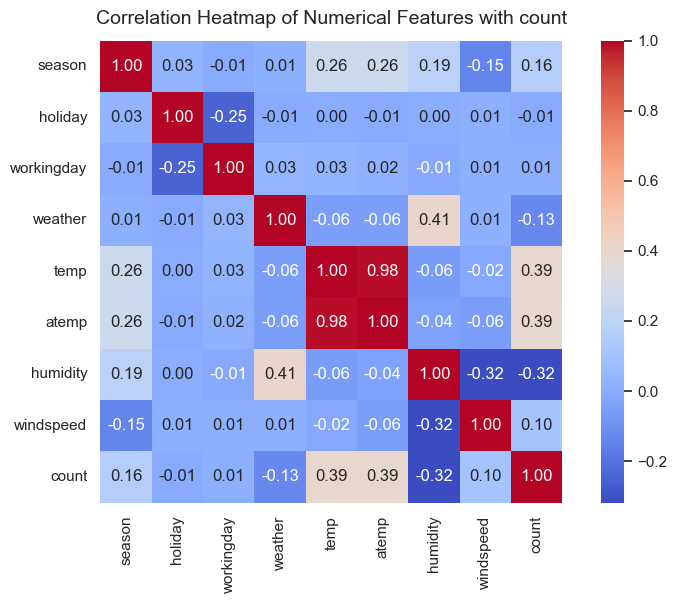

In [28]:
# Plot correlation among various features
numeric_df=df.select_dtypes(include=['float64', 'int64'])
corr_matrix=numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of Numerical Features with count", fontsize=14, pad=12)
plt.show()


In [12]:
# Heatmap colclusions:
# 1. Temp and atemp are highly correlated to count so we can ignor eone of them or appl ylasso regression taht reduces effect of one of them
# 2.Humidity and count are negatively correlated, soits an important feature 

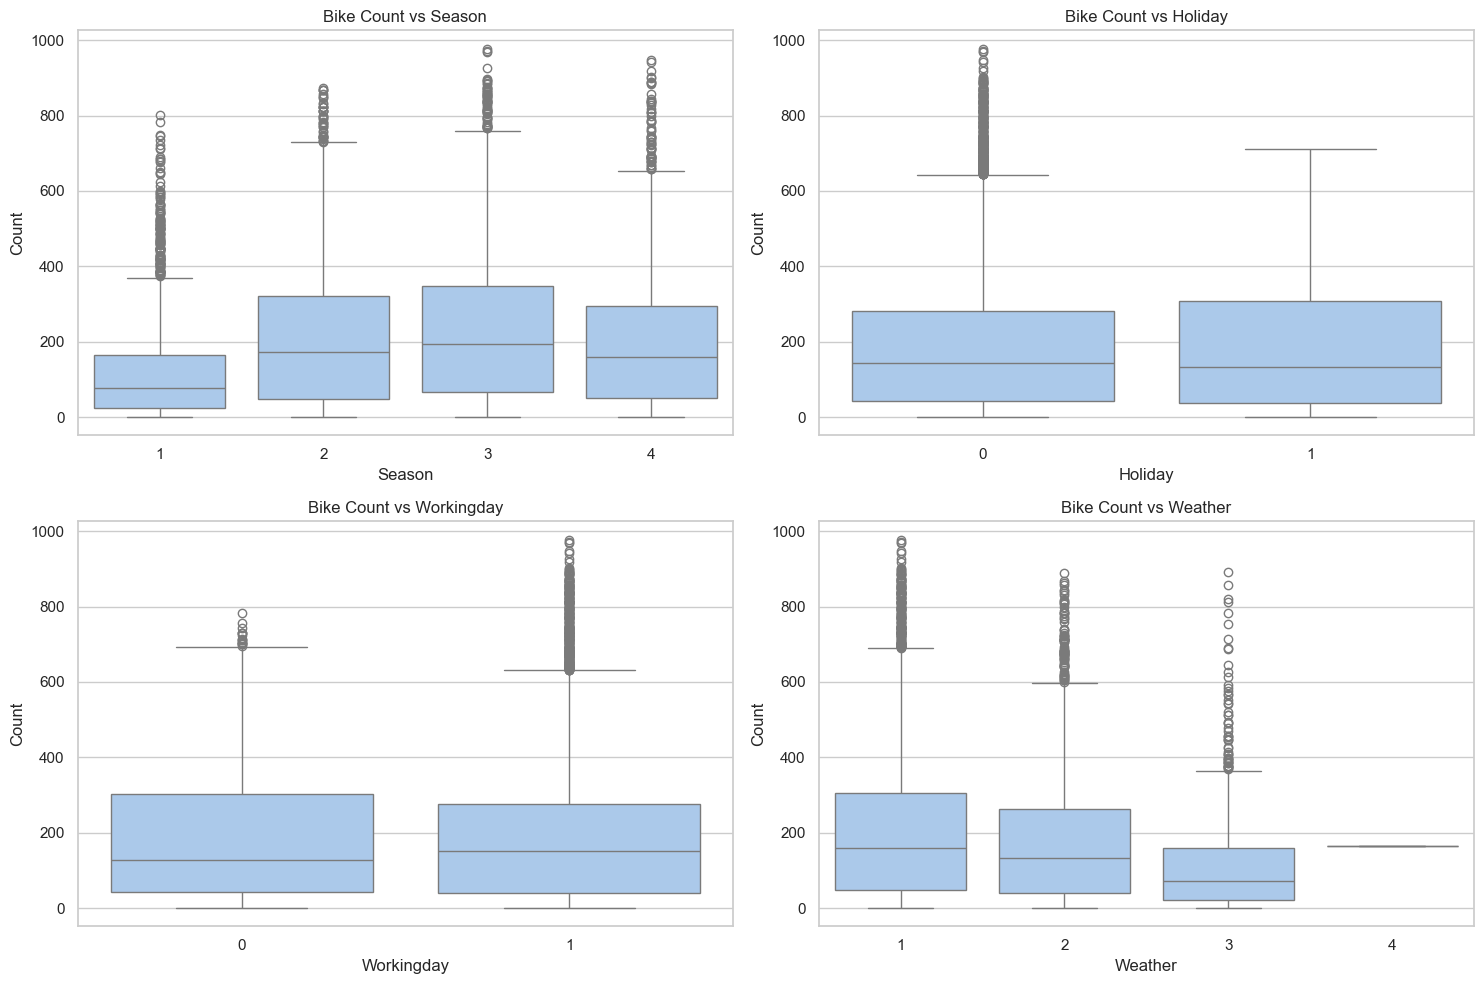

In [30]:
# Boc plot
cat_features=['season', 'holiday', 'workingday', 'weather']
sns.set(style='whitegrid', palette='pastel')
plt.figure(figsize=(15, 10))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=feature, y='count', data=df)
    plt.title(f'Bike Count vs {feature.capitalize()}', fontsize=12)
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    
plt.tight_layout()
plt.show()

In [ ]:
# Boxplots conclusions:
# 1. Bikes rentals are more in season 2 and 3 and leastin season 1, so as season gets colder srentals get lesser
# 2. Working daya nd holidays have very little impact on bike rentals but overall bikes are rented more on holidays
# 3. Bikes rentals are more in warmer weathers and lesser in colder weathers

C:\Users\akank\AppData\Local\Temp\ipykernel_7064\1224574451.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['count'].resample('M').mean().plot(figsize=(10,5))


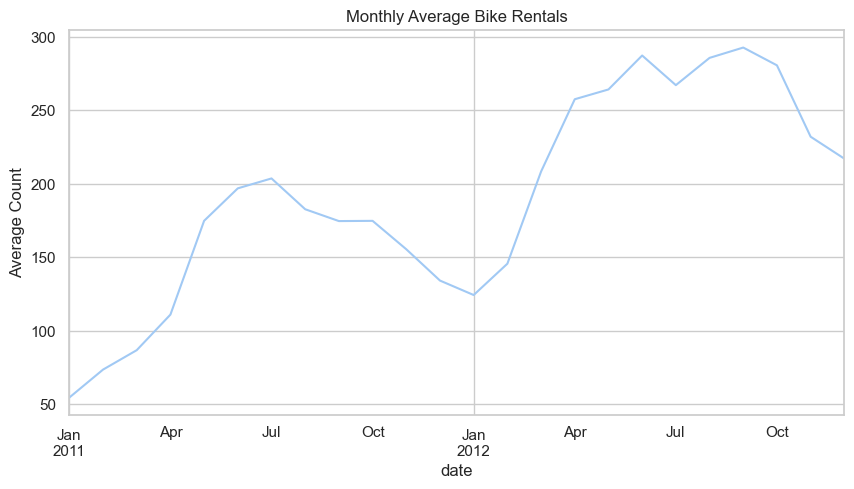

In [ ]:
# Time series trend
df['date']=pd.to_datetime(df['datetime'])
df.set_index('date', inplace=True)
df['count'].resample('M').mean().plot(figsize=(10,5))
plt.title("Monthly Average Bike Rentals")
plt.ylabel("Average Count")
plt.show()

In [ ]:
# Time-series plot conclusion:
# 1. Rentals are lowest at the beginning of the year (January, February, March) of both 2011 and 2012, reflecting cold weather.
# 2. Counts increase rapidly from March to June.
# 3. Rentals consistently peak during the warmest months (June through September/October), where the highest averages are observed.
# 4. A sharp decrease in rentals occurs starting around October as temperatures drop.
# 5. The peak count in 2012 (reaching nearly 300) is significantly higher than the peak count in 2011 (reaching only about 200).
# 6. The trough (low point) in January 2012 (around 125) is higher than the trough in January 2011 (around 50).

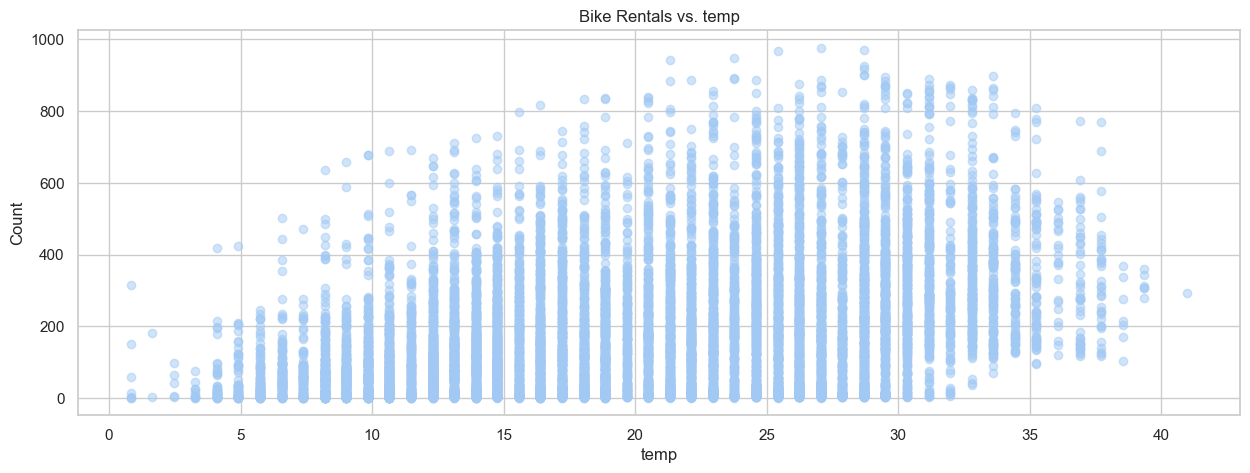

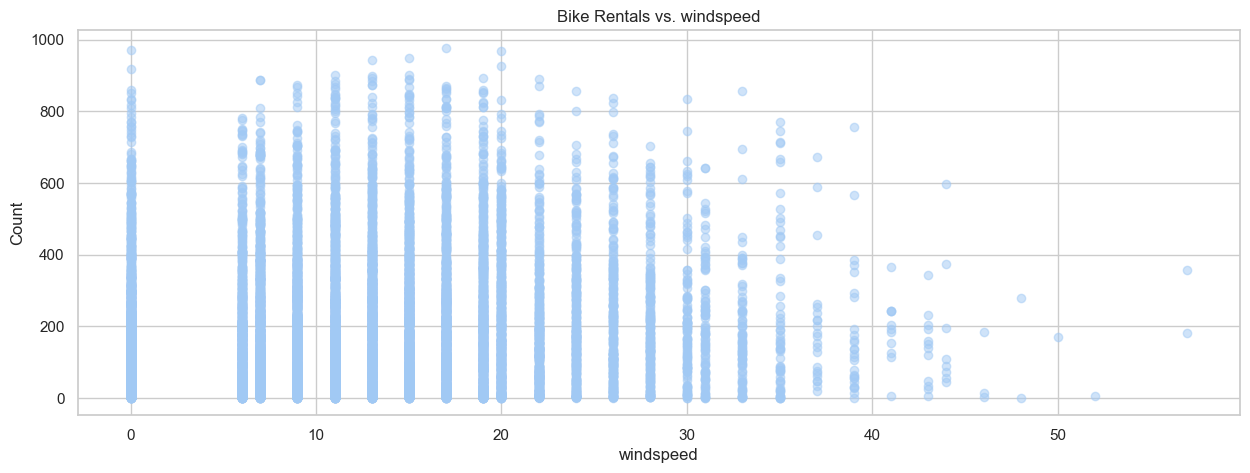

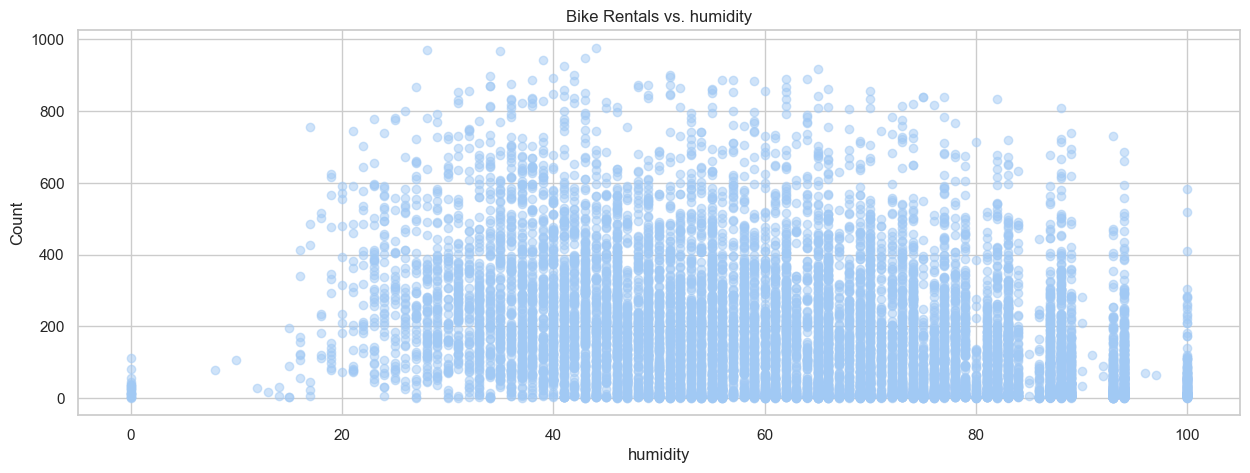

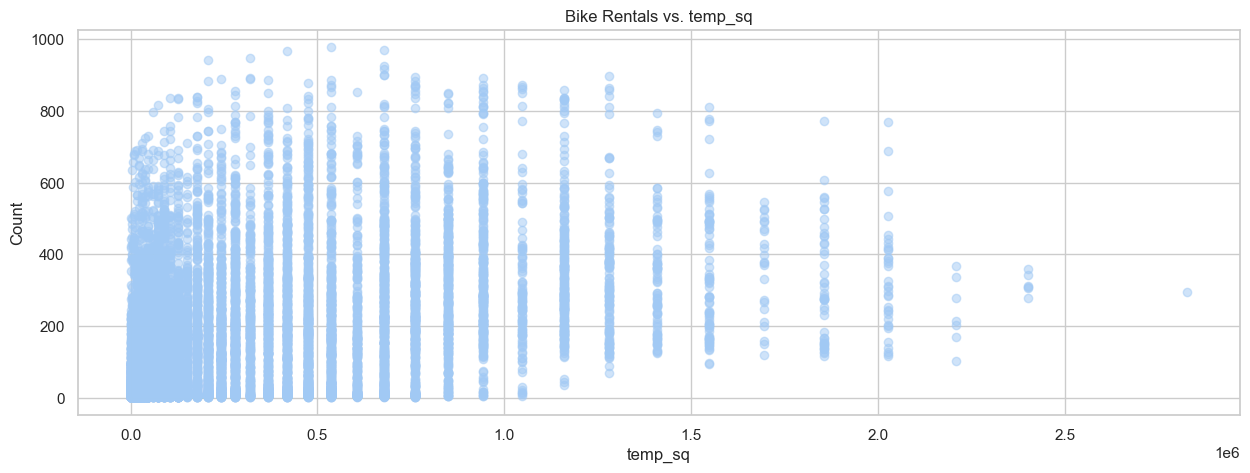

In [82]:
# Create a scatter plot of count vs. all the numerical features justify the polynomial relationship
df['temp_sq']=df['temp']**4+df['temp']**2
features=['temp', 'windspeed', 'humidity', 'temp_sq']
for feature in features:
    plt.figure(figsize=(15, 5))
    plt.scatter(df[feature], df['count'], alpha=0.5)
    plt.title(f'Bike Rentals vs. {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Count')
    plt.show()

In [ ]:
# Scatter plot conclusion:
# 1. Plot between temprature and count is polynomial, so polynomial regression is better than simple linear

In [83]:

# df['temp_sq']=df['temp']**64
# max_counts_by_temp = df.groupby('temp_sq')['count'].max().reset_index()

# plt.figure(figsize=(10, 6))
# # 1. Plot the original scatter data (as background)
# plt.scatter(df['temp_sq'], df['count'], alpha=0.1, color='skyblue', label='All Data Points')

# # 2. Plot the line connecting the peak counts
# plt.plot(max_counts_by_temp['temp_sq'], max_counts_by_temp['count'],
#          color='a', linewidth=2, marker='o', markersize=4, label='Maximum Count per Degree')

# plt.title("Bike Rentals vs. Temperature: Peak Usage Line")
# plt.xlabel("Temperature (°C)")
# plt.ylabel("Bike Count")
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.legend()
# plt.show()